#Задание 1.
Реализуйте полносвязную нейронную сеть с помощью библиотеки Tensor Flow. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (Stochastic Gradient Descent, SGD). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).
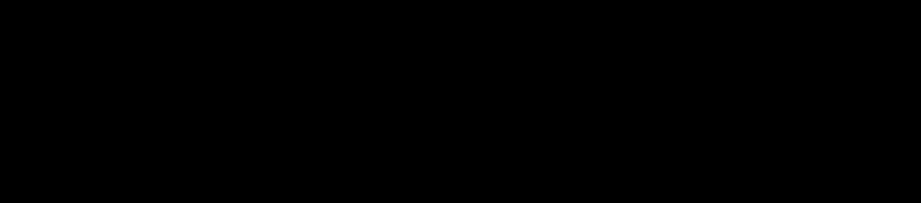

In [18]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Параметры
dataset_path = "notMNIST_large"
image_size = (28, 28)
hidden_layers = [256, 128, 64]  # ← можно задать от 1 до 5 слоёв, до нескольких сотен нейронов
X, y = [], []
classes = sorted(os.listdir(dataset_path))

# Загрузка изображений
for label, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for fname in os.listdir(class_folder):
            if fname.endswith('.png'):
                try:
                    img_path = os.path.join(class_folder, fname)
                    img = Image.open(img_path).convert('L').resize(image_size)
                    X.append(np.array(img).flatten() / 255.0)
                    y.append(label)
                except:
                    continue

X = np.array(X)
y = np.array(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Построение модели
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28 * 28,)))

for units in hidden_layers:
    model.add(tf.keras.layers.Dense(units, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Оценка
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовой выборке: {test_acc:.4f}")

Epoch 1/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8413 - loss: 0.5475 - val_accuracy: 0.8672 - val_loss: 0.4510
Epoch 2/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8756 - loss: 0.4156 - val_accuracy: 0.8829 - val_loss: 0.3975
Epoch 3/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8889 - loss: 0.3705 - val_accuracy: 0.8898 - val_loss: 0.3700
Epoch 4/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8975 - loss: 0.3414 - val_accuracy: 0.8916 - val_loss: 0.3608
Epoch 5/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9033 - loss: 0.3203 - val_accuracy: 0.8990 - val_loss: 0.3381
Epoch 6/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9079 - loss: 0.3036 - val_accuracy: 0.9024 - val_loss: 0.3286
Epoch 7/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9119 - loss: 0.2894 - val_accuracy: 0.9044 - val_loss: 0.3233
Epoch 8/10
11906/11906 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

#Задание 2.
#Как улучшилась точность классификатора по сравнению с логистической регрессией?
#Точность улучшилась на 1%

#Задание 3.
#Используйте регуляризацию и метод сброса нейронов (dropout) для борьбы с переобучением. Как улучшилось качество классификации?
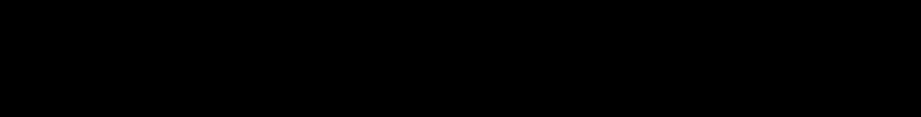

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

# Пример архитектуры с регуляризацией и Dropout
model = tf.keras.Sequential([
    layers.Input(shape=(28 * 28,)),

    # Первый скрытый слой с L2-регуляризацией и Dropout
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    # Второй скрытый слой
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    # Выходной слой
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

# Оценка
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовой выборке: {test_acc:.4f}")

Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5095 - loss: 2.0835 - val_accuracy: 0.8344 - val_loss: 1.3314
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 1.3711 - val_accuracy: 0.8598 - val_loss: 1.1193
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 1.2085 - val_accuracy: 0.8778 - val_loss: 1.0363
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 1.1238 - val_accuracy: 0.8792 - val_loss: 1.0013
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 1.0763 - val_accuracy: 0.8825 - val_loss: 0.9762
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 1.0431 - val_accuracy: 0.8879 - val_loss: 0.9575
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 1.0187 - val_accuracy: 0.8912 - val_loss: 0.9426
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.9893 - val_accuracy: 0.

#Задание 4.
#Воспользуйтесь динамически изменяемой скоростью обучения (learning rate). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?
94.53%
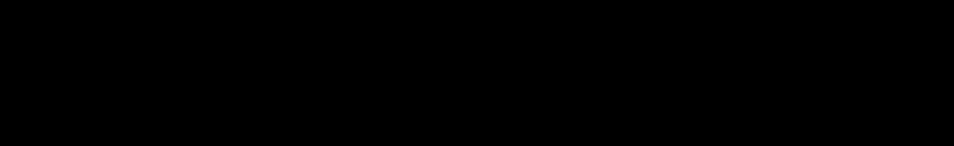

In [19]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Функция изменения learning rate по эпохам
def lr_schedule(epoch, lr):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.005
    else:
        return 0.001

lr_callback = LearningRateScheduler(lr_schedule)

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение с динамическим learning rate
model.fit(X_train, y_train, epochs=15, batch_size=64,
          validation_split=0.1, callbacks=[lr_callback])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовой выборке: {test_acc:.4f}")


Epoch 1/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9278 - loss: 0.2363 - val_accuracy: 0.9090 - val_loss: 0.3095 - learning_rate: 0.0100
Epoch 2/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9296 - loss: 0.2302 - val_accuracy: 0.9104 - val_loss: 0.3065 - learning_rate: 0.0100
Epoch 3/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9311 - loss: 0.2253 - val_accuracy: 0.9103 - val_loss: 0.3101 - learning_rate: 0.0100
Epoch 4/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9326 - loss: 0.2206 - val_accuracy: 0.9109 - val_loss: 0.3095 - learning_rate: 0.0100
Epoch 5/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9337 - loss: 0.2163 - val_accuracy: 0.9120 - val_loss: 0.3056 - learning_rate: 0.0100
Epoch 6/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9381 - loss: 0.2040 - val_accuracy: 0.9126 - val_loss: 0.3035 - learning_rate: 0.0050
Epoch 7/15
5953/5953 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9390